In [2]:
import pandas as pd
data= pd.read_csv("TrainingDataCifar100Vgg19Size100.csv")
data_test=pd.read_csv("TestingDataCifar100Vgg19Size100.csv")

# Classifier

In [3]:
#github
classLabel = "Class Label"

X = data.drop(classLabel,axis = 1).values
Y = data[classLabel].values

X_t= data_test.drop(classLabel,axis = 1).values
y_test= data_test[classLabel].values

In [4]:
Features = data.drop(classLabel,axis = 1).columns.values
#features=list(Features.columns.values)
print(Features)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85'
 '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99']


In [ ]:
pip install sklearn

You should consider upgrading via the 'C:\Users\jowens\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=7dbc2812cce9de8ce038459c4564dbfc73f8d36e99090e5b11ab9270ac864eb1
  Stored in directory: c:\users\jowens\appdata\local\pip\cache\wheels\9b\13\01\6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn


In [5]:
from sklearn.preprocessing import LabelBinarizer
#custom code
Y_train=LabelBinarizer().fit_transform(Y)
Y_test=LabelBinarizer().fit_transform(y_test)

In [6]:
pip install scikit-XCS

     |████████████████████████████████| 316 kB 4.0 MB/s 
  Created wheel for scikit-XCS: filename=scikit_XCS-1.0.7-py3-none-any.whl size=35944 sha256=f725eee67cbdd61475d407041f8d86b53c1abd7635bb5aa84a78ab07212e82cd
  Stored in directory: /root/.cache/pip/wheels/10/5e/44/b99e55f3c73e70da959ec35518bd4209acd37be839d55815e8
Successfully built scikit-XCS


In [6]:
from skXCS import XCS
model = XCS(N=10000, learning_iterations = 50000,nu = 10)
trainedModel = model.fit(X,Y)

# Rule Data

In [7]:
trainedModel.export_iteration_tracking_data("iterationData_cifar100_Vgg19_100_XCS.csv")

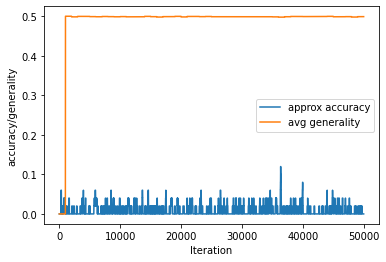

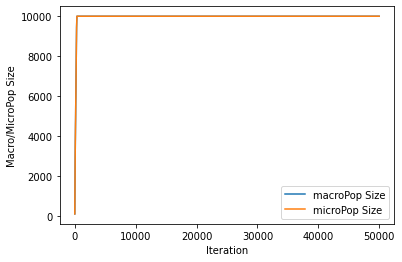

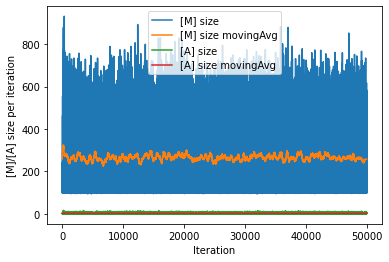

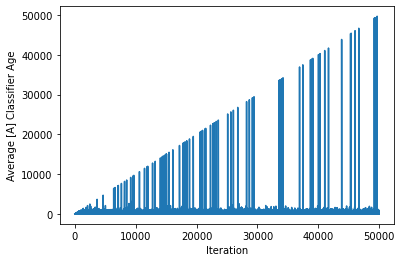

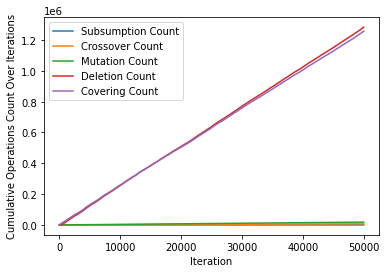

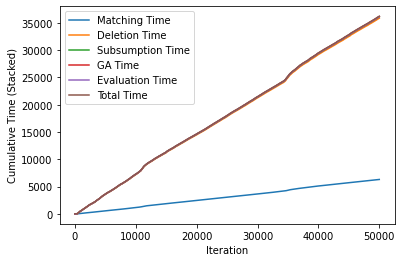

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("iterationData_cifar100_Vgg19_100_XCS.csv")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values
generality = dataTracking['Average Population Generality'].values
macroPop = dataTracking["Macropopulation Size"].values
microPop = dataTracking["Micropopulation Size"].values
mSize = dataTracking["Match Set Size"].values
aSize = dataTracking["Action Set Size"].values
experience = dataTracking["Average Iteration Age of Action Set Classifiers"].values
subsumption = dataTracking["# Classifiers Subsumed in Iteration"].values
crossover = dataTracking["# Crossover Operations Performed in Iteration"].values
mutation = dataTracking["# Mutation Operations Performed in Iteration"].values
covering = dataTracking["# Covering Operations Performed in Iteration"].values
deletion = dataTracking["# Deletion Operations Performed in Iteration"].values

gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total GA Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

plt.plot(iterations,accuracy,label="approx accuracy")
plt.plot(iterations,generality,label="avg generality")
plt.xlabel('Iteration')
plt.ylabel('accuracy/generality')
plt.legend()
plt.show()

plt.plot(iterations,macroPop,label="macroPop Size")
plt.plot(iterations,microPop,label="microPop Size")
plt.xlabel('Iteration')
plt.ylabel('Macro/MicroPop Size')
plt.legend()
plt.show()

plt.plot(iterations,mSize,label="[M] size")
plt.plot(iterations,movingAvg(mSize),label="[M] size movingAvg")
plt.plot(iterations,aSize,label="[A] size")
plt.plot(iterations,movingAvg(aSize),label="[A] size movingAvg")
plt.xlabel('Iteration')
plt.ylabel('[M]/[A] size per iteration')
plt.legend()
plt.show()

plt.plot(iterations,experience)
plt.ylabel('Average [A] Classifier Age')
plt.xlabel('Iteration')
plt.show()

plt.plot(iterations,cumulativeFreq(subsumption),label="Subsumption Count")
plt.plot(iterations,cumulativeFreq(crossover),label="Crossover Count")
plt.plot(iterations,cumulativeFreq(mutation),label="Mutation Count")
plt.plot(iterations,cumulativeFreq(deletion),label="Deletion Count")
plt.plot(iterations,cumulativeFreq(covering),label="Covering Count")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Operations Count Over Iterations')
plt.legend()
plt.show()

plt.plot(iterations,mTime,label="Matching Time")
plt.plot(iterations,delTime+mTime,label="Deletion Time")
plt.plot(iterations,subTime+delTime+mTime,label="Subsumption Time")
plt.plot(iterations,selTime+subTime+delTime+mTime,label="GA Time")
plt.plot(iterations,evalTime+selTime+subTime+delTime+mTime,label="Evaluation Time")
plt.plot(iterations,gTime,label="Total Time")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Stacked)')
plt.legend()
plt.show()

In [9]:
trainedModel.export_final_rule_population("RulePopulationCifar100Vgg19100_XCS.csv",Features,classLabel)

populationData2 = pd.read_csv("RulePopulationCifar100Vgg19100_XCS.csv")
display(populationData2)

,0,1,2,3,4,5,6,7,8,9,...,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Experience,Match Count
0,"-4.958788609999999,8.384430386","-11.5330176323,9.9067978823",#,"-2.754077078,4.790064932",#,"-5.83294257095,5.09612813095","-2.3824011948,4.7874440808",#,#,"-1.2588280682000015,15.792769336200001",...,0.0,1.0,1,1.0,46793,46793,0.51,0.000091,0,27
1,"-6.310212155849999,18.041162511849997","-10.7191932351,0.4536683711",#,#,"-14.4558839774,6.4289951294",#,"-6.171017756299999,8.680804600299998",#,#,"-12.922625601250001,11.671024501250002",...,0.0,1.0,1,1.0,46798,46798,0.51,0.000091,0,2
2,"-8.847662011949998,14.836551705949999","-10.2519315542,6.0544070062","-13.6546801961,1.8633994501000002","-12.9757355462,-3.6209994537999997",#,#,"-4.76655930045,2.1472200724499997",#,#,#,...,0.0,1.0,1,1.0,46964,46964,0.60,0.000091,0,1
3,#,"-9.7860010635,6.822306729500001",#,#,"-6.97390496565,6.23270976365",#,"-9.8445400526,4.4951504986",#,#,#,...,0.0,1.0,1,1.0,47015,47015,0.51,0.000091,0,14
4,"-5.587476951399999,11.758707743399999",#,#,"-19.620969417799998,1.2008625298000002",#,#,"-12.10263450635,3.517385558349999",#,#,"-12.706626582150001,3.36122481815",...,0.0,1.0,1,1.0,47045,47045,0.47,0.000091,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"-3.9462133804499997,16.40219558845",#,"-6.035513105850001,2.29827040785","-5.798142017000001,4.763656797","-10.3838074183,9.886810538299999","-7.777479016750001,7.635312998750002",#,#,#,"-10.947963563450003,11.022363861450003",...,0.0,1.0,1,7.0,49997,49997,0.54,0.000640,0,1
9996,#,"-11.1820146909,7.8420469629000005","-6.073021269750001,3.98499331575","-4.3470720063999995,6.8182581684","-5.042338712599999,4.7858396906","-3.9701245515,4.4368529115",#,#,#,"-10.636855626450004,11.333471798450002",...,0.0,1.0,1,1.0,49998,49998,0.47,0.000091,0,1
9997,#,"-9.3578250756,9.3642673456","-12.785606003999998,4.456704714","-5.782669576,6.28795764","-12.895982620849999,7.68176591085",#,#,"-4.912651361,3.7105118649999995","-0.9099338440700002,9.59900359207","-4.904208874550001,5.916997170550001",...,0.0,1.0,1,1.0,49999,49999,0.55,0.000091,0,1
9998,#,#,#,"-10.2719162722,5.1181334282","-10.2747707356,-0.44659233240000074",#,#,"-10.512563231,6.733763220999999",#,"-11.349744248650001,1.4389538046500014",...,0.0,1.0,1,5.0,49999,49999,0.52,0.000457,0,0


In [10]:
trainedModel.export_final_rule_population_DCAL("RulePopulationCifar100Vgg191002_XCS.csv",Features,classLabel)

populationData3 = pd.read_csv("RulePopulationCifar100Vgg191002_XCS.csv")
display(populationData3)

,Specified Values,Specified Attribute Names,Class Label,Fitness,Prediction,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Experience,Match Count
0,"[-4.958788609999999,8.384430386], [-11.5330176...","0, 1, 3, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, ...",81,0.010000,10.0,0.0,1.0,1,1.0,46793,46793,0.51,0.000091,0,27
1,"[-6.310212155849999,18.041162511849997], [-10....","0, 1, 4, 6, 9, 10, 11, 12, 16, 17, 18, 20, 22,...",31,0.010000,10.0,0.0,1.0,1,1.0,46798,46798,0.51,0.000091,0,2
2,"[-8.847662011949998,14.836551705949999], [-10....","0, 1, 2, 3, 6, 10, 11, 12, 14, 19, 21, 23, 24,...",35,0.010000,10.0,0.0,1.0,1,1.0,46964,46964,0.60,0.000091,0,1
3,"[-9.7860010635,6.822306729500001], [-6.9739049...","1, 4, 6, 10, 11, 12, 13, 15, 16, 18, 19, 23, 2...",22,0.010000,10.0,0.0,1.0,1,1.0,47015,47015,0.51,0.000091,0,14
4,"[-5.587476951399999,11.758707743399999], [-19....","0, 3, 6, 9, 11, 12, 15, 17, 22, 26, 29, 30, 32...",50,0.010000,10.0,0.0,1.0,1,1.0,47045,47045,0.47,0.000091,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"[-3.9462133804499997,16.40219558845], [-6.0355...","0, 2, 3, 4, 5, 9, 10, 15, 18, 19, 20, 23, 26, ...",87,0.005834,0.0,0.0,1.0,1,7.0,49997,49997,0.54,0.000640,0,1
9996,"[-11.1820146909,7.8420469629000005], [-6.07302...","1, 2, 3, 4, 5, 9, 10, 15, 17, 18, 19, 22, 24, ...",51,0.010000,10.0,0.0,1.0,1,1.0,49998,49998,0.47,0.000091,0,1
9997,"[-9.3578250756,9.3642673456], [-12.78560600399...","1, 2, 3, 4, 7, 8, 9, 13, 14, 15, 18, 19, 21, 2...",19,0.010000,10.0,0.0,1.0,1,1.0,49999,49999,0.55,0.000091,0,1
9998,"[-10.2719162722,5.1181334282], [-10.2747707356...","3, 4, 7, 9, 12, 13, 15, 17, 18, 23, 24, 26, 28...",48,0.007840,0.0,0.0,1.0,1,5.0,49999,49999,0.52,0.000457,0,0


# ROC and PRC Curves

## 0-49

### ROC and PRC Curves 0-9 

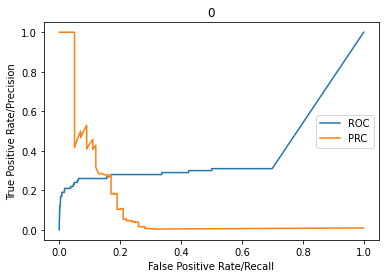

PRC AUC:0.10979966409738587
ROC AUC:0.3944984848484848


In [11]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = trainedModel.predict_proba(X_t)
fpr1, tpr1, thresholds1 = roc_curve(Y_test[:,0], probs[:,0])
prec1, recall1, thresholds1 = precision_recall_curve(Y_test[:,0], probs[:,0])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('0')
plt.show()

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

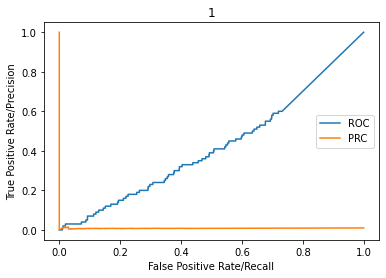

PRC AUC:0.00824079532752467
ROC AUC:0.4216782828282828


In [12]:
fpr2, tpr2, thresholds2 = roc_curve(Y_test[:,1], probs[:, 1])
prec2, recall2, thresholds2 = precision_recall_curve(Y_test[:,1], probs[:, 1])

plt.plot(fpr2,tpr2,label="ROC")
plt.plot(recall2,prec2,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('1')
plt.show()

print("PRC AUC:" + str(auc(recall2, prec2)))
print("ROC AUC:" + str(auc(fpr2, tpr2)))

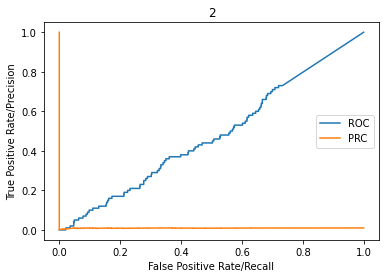

PRC AUC:0.009243213616290862
ROC AUC:0.4791974747474748


In [13]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test[:,2], probs[:, 2])
prec3, recall3, thresholds3 = precision_recall_curve(Y_test[:,2], probs[:, 2])

plt.plot(fpr3,tpr3,label="ROC")
plt.plot(recall3,prec3,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('2')
plt.show()

print("PRC AUC:" + str(auc(recall3, prec3)))
print("ROC AUC:" + str(auc(fpr3, tpr3)))

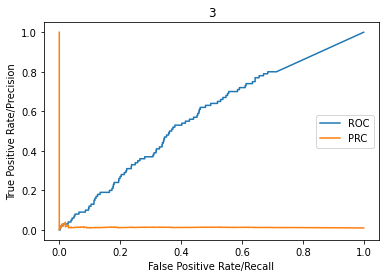

PRC AUC:0.012556870826388266
ROC AUC:0.5759131313131312


In [14]:
fpr4, tpr4, thresholds4 = roc_curve(Y_test[:,3], probs[:, 3])
prec4, recall4, thresholds4 = precision_recall_curve(Y_test[:,3], probs[:, 3])

plt.plot(fpr4,tpr4,label="ROC")
plt.plot(recall4,prec4,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('3')
plt.show()

print("PRC AUC:" + str(auc(recall4, prec4)))
print("ROC AUC:" + str(auc(fpr4, tpr4)))

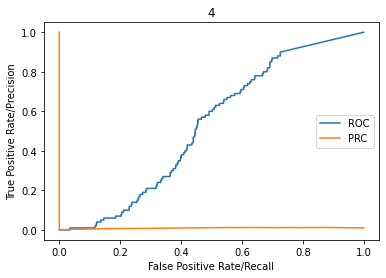

PRC AUC:0.009455288452395332
ROC AUC:0.523189898989899


In [15]:
fpr5, tpr5, thresholds5 = roc_curve(Y_test[:,4], probs[:, 4])
prec5, recall5, thresholds5 = precision_recall_curve(Y_test[:,4], probs[:, 4])

plt.plot(fpr5,tpr5,label="ROC")
plt.plot(recall5,prec5,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('4')
plt.show()

print("PRC AUC:" + str(auc(recall5, prec5)))
print("ROC AUC:" + str(auc(fpr5, tpr5)))

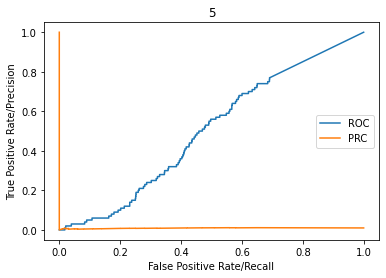

PRC AUC:0.009260587405960313
ROC AUC:0.5024035353535354


In [16]:
fpr6, tpr6, thresholds6 = roc_curve(Y_test[:,5], probs[:, 5])
prec6, recall6, thresholds6 = precision_recall_curve(Y_test[:,5], probs[:, 5])

plt.plot(fpr6,tpr6,label="ROC")
plt.plot(recall6,prec6,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('5')
plt.show()

print("PRC AUC:" + str(auc(recall6, prec6)))
print("ROC AUC:" + str(auc(fpr6, tpr6)))

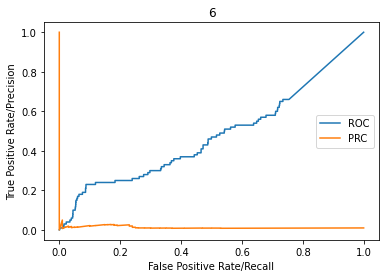

PRC AUC:0.01200813025339582
ROC AUC:0.4775176767676768


In [17]:
fpr7, tpr7, thresholds7 = roc_curve(Y_test[:,6], probs[:, 6])
prec7, recall7, thresholds7 = precision_recall_curve(Y_test[:,6], probs[:, 6])

plt.plot(fpr7,tpr7,label="ROC")
plt.plot(recall7,prec7,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('6')
plt.show()

print("PRC AUC:" + str(auc(recall7, prec7)))
print("ROC AUC:" + str(auc(fpr7, tpr7)))

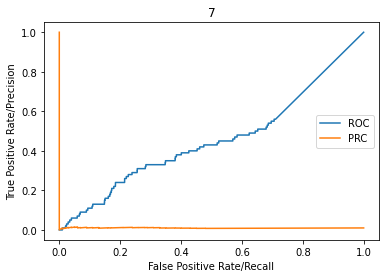

PRC AUC:0.009574530716397264
ROC AUC:0.4538409090909091


In [18]:
fpr8, tpr8, thresholds8 = roc_curve(Y_test[:,7], probs[:, 7])
prec8, recall8, thresholds8 = precision_recall_curve(Y_test[:,7], probs[:, 7])

plt.plot(fpr8,tpr8,label="ROC")
plt.plot(recall8,prec8,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('7')
plt.show()

print("PRC AUC:" + str(auc(recall8, prec8)))
print("ROC AUC:" + str(auc(fpr8, tpr8)))

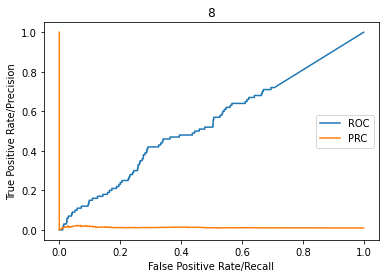

PRC AUC:0.011968929295554745
ROC AUC:0.5384318181818182


In [19]:
fpr9, tpr9, thresholds9 = roc_curve(Y_test[:,8], probs[:, 8])
prec9, recall9, thresholds9 = precision_recall_curve(Y_test[:,8], probs[:, 8])

plt.plot(fpr9,tpr9,label="ROC")
plt.plot(recall9,prec9,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('8')
plt.show()

print("PRC AUC:" + str(auc(recall9, prec9)))
print("ROC AUC:" + str(auc(fpr9, tpr9)))

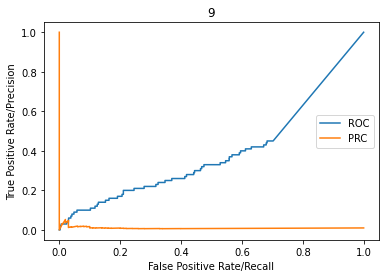

PRC AUC:0.009288283974580876
ROC AUC:0.3906272727272727


In [20]:
fpr10, tpr10, thresholds10 = roc_curve(Y_test[:,9], probs[:, 9])
prec10, recall10, thresholds10 = precision_recall_curve(Y_test[:,9], probs[:, 9])

plt.plot(fpr10,tpr10,label="ROC")
plt.plot(recall10,prec10,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('9')
plt.show()

print("PRC AUC:" + str(auc(recall10, prec10)))
print("ROC AUC:" + str(auc(fpr10, tpr10)))

### ROC and PRC Curve 10-19

fpr11, tpr11, thresholds11 = roc_curve(Y_test[:,10], probs[:,10])
prec11, recall11, thresholds11 = precision_recall_curve(Y_test[:,10], probs[:,10])

plt.plot(fpr11,tpr11,label="ROC")
plt.plot(recall11,prec11,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('10')
plt.show()

print("PRC AUC:" + str(auc(recall11, prec11)))
print("ROC AUC:" + str(auc(fpr11, tpr11)))

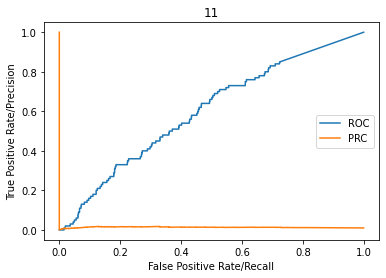

PRC AUC:0.013132780378956684
ROC AUC:0.5986560606060608


In [21]:
fpr12, tpr12, thresholds12 = roc_curve(Y_test[:,11], probs[:, 11])
prec12, recall12, thresholds12 = precision_recall_curve(Y_test[:,11], probs[:, 11])

plt.plot(fpr12,tpr12,label="ROC")
plt.plot(recall12,prec12,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('11')
plt.show()

print("PRC AUC:" + str(auc(recall12, prec12)))
print("ROC AUC:" + str(auc(fpr12, tpr12)))

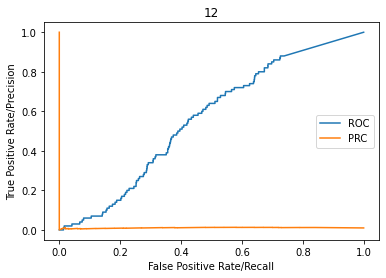

PRC AUC:0.01071289199477083
ROC AUC:0.5622257575757575


In [22]:
fpr13, tpr13, thresholds13 = roc_curve(Y_test[:,12], probs[:, 12])
prec13, recall13, thresholds13 = precision_recall_curve(Y_test[:,12], probs[:, 12])

plt.plot(fpr13,tpr13,label="ROC")
plt.plot(recall13,prec13,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('12')
plt.show()

print("PRC AUC:" + str(auc(recall13, prec13)))
print("ROC AUC:" + str(auc(fpr13, tpr13)))

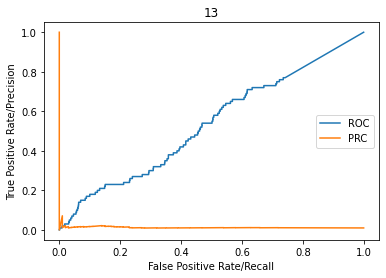

PRC AUC:0.012102371011315638
ROC AUC:0.5341570707070707


In [23]:
fpr14, tpr14, thresholds14 = roc_curve(Y_test[:,13], probs[:, 13])
prec14, recall14, thresholds14 = precision_recall_curve(Y_test[:,13], probs[:, 13])

plt.plot(fpr14,tpr14,label="ROC")
plt.plot(recall14,prec14,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('13')
plt.show()

print("PRC AUC:" + str(auc(recall14, prec14)))
print("ROC AUC:" + str(auc(fpr14, tpr14)))

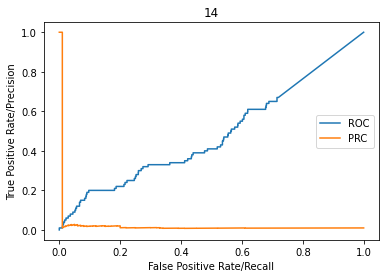

PRC AUC:0.021480561493552864
ROC AUC:0.4842969696969696


In [24]:
fpr15, tpr15, thresholds15 = roc_curve(Y_test[:,14], probs[:, 14])
prec15, recall15, thresholds15 = precision_recall_curve(Y_test[:,14], probs[:, 14])

plt.plot(fpr15,tpr15,label="ROC")
plt.plot(recall15,prec15,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('14')
plt.show()

print("PRC AUC:" + str(auc(recall15, prec15)))
print("ROC AUC:" + str(auc(fpr15, tpr15)))

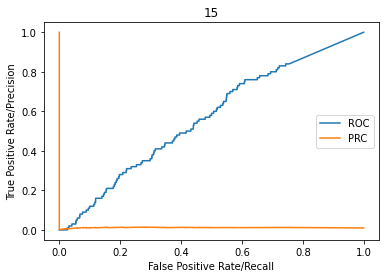

PRC AUC:0.011506411442187385
ROC AUC:0.5660792929292929


In [25]:
fpr16, tpr16, thresholds16 = roc_curve(Y_test[:,15], probs[:, 15])
prec16, recall16, thresholds16 = precision_recall_curve(Y_test[:,15], probs[:, 15])

plt.plot(fpr16,tpr16,label="ROC")
plt.plot(recall16,prec16,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('15')
plt.show()

print("PRC AUC:" + str(auc(recall16, prec16)))
print("ROC AUC:" + str(auc(fpr16, tpr16)))

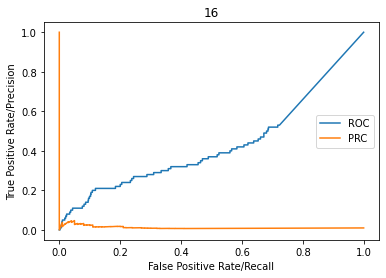

PRC AUC:0.011617330709215988
ROC AUC:0.43007171717171716


In [26]:
fpr17, tpr17, thresholds17 = roc_curve(Y_test[:,16], probs[:, 16])
prec17, recall17, thresholds17 = precision_recall_curve(Y_test[:,16], probs[:, 16])

plt.plot(fpr17,tpr17,label="ROC")
plt.plot(recall17,prec17,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('16')
plt.show()

print("PRC AUC:" + str(auc(recall17, prec17)))
print("ROC AUC:" + str(auc(fpr17, tpr17)))

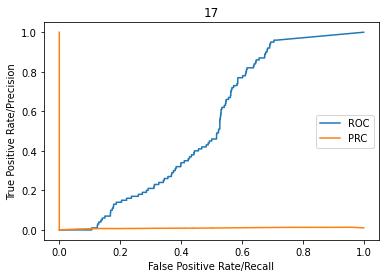

PRC AUC:0.009574072633423211
ROC AUC:0.5315858585858586


In [27]:
fpr18, tpr18, thresholds18 = roc_curve(Y_test[:,17], probs[:, 17])
prec18, recall18, thresholds18 = precision_recall_curve(Y_test[:,17], probs[:, 17])

plt.plot(fpr18,tpr18,label="ROC")
plt.plot(recall18,prec18,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('17')
plt.show()

print("PRC AUC:" + str(auc(recall18, prec18)))
print("ROC AUC:" + str(auc(fpr18, tpr18)))

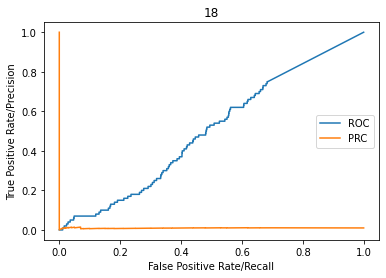

PRC AUC:0.009647094671275927
ROC AUC:0.5012282828282829


In [28]:
fpr19, tpr19, thresholds19 = roc_curve(Y_test[:,18], probs[:, 18])
prec19, recall19, thresholds19 = precision_recall_curve(Y_test[:,18], probs[:, 18])

plt.plot(fpr19,tpr19,label="ROC")
plt.plot(recall19,prec19,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('18')
plt.show()

print("PRC AUC:" + str(auc(recall19, prec19)))
print("ROC AUC:" + str(auc(fpr19, tpr19)))

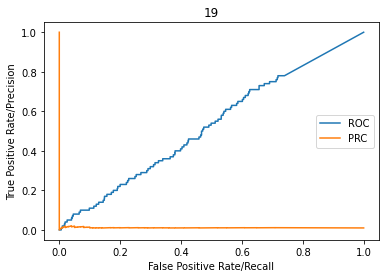

PRC AUC:0.01096005917834962
ROC AUC:0.5261540404040405


In [29]:
fpr20, tpr20, thresholds20 = roc_curve(Y_test[:,19], probs[:, 19])
prec20, recall20, thresholds20 = precision_recall_curve(Y_test[:,19], probs[:, 19])

plt.plot(fpr20,tpr20,label="ROC")
plt.plot(recall20,prec20,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('19')
plt.show()

print("PRC AUC:" + str(auc(recall20, prec20)))
print("ROC AUC:" + str(auc(fpr20, tpr20)))

### ROC and PRC Curve 20-29

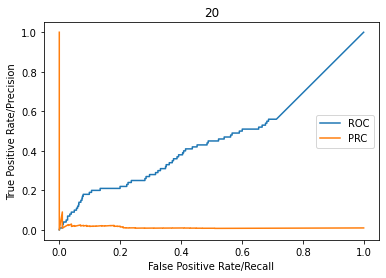

PRC AUC:0.01158438167002265
ROC AUC:0.4603328282828283


In [30]:
fpr21, tpr21, thresholds21 = roc_curve(Y_test[:,20], probs[:,20])
prec21, recall21, thresholds21 = precision_recall_curve(Y_test[:,20], probs[:,20])

plt.plot(fpr21,tpr21,label="ROC")
plt.plot(recall21,prec21,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('20')
plt.show()

print("PRC AUC:" + str(auc(recall21, prec21)))
print("ROC AUC:" + str(auc(fpr21, tpr21)))

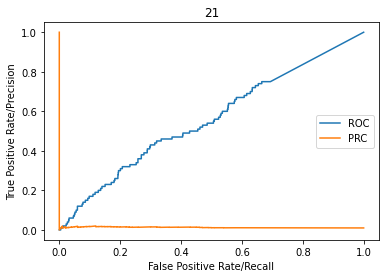

PRC AUC:0.012592475901091164
ROC AUC:0.5583979797979798


In [31]:
fpr22, tpr22, thresholds22 = roc_curve(Y_test[:,21], probs[:, 21])
prec22, recall22, thresholds22 = precision_recall_curve(Y_test[:,21], probs[:, 21])

plt.plot(fpr22,tpr22,label="ROC")
plt.plot(recall22,prec22,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('21')
plt.show()

print("PRC AUC:" + str(auc(recall22, prec22)))
print("ROC AUC:" + str(auc(fpr22, tpr22)))

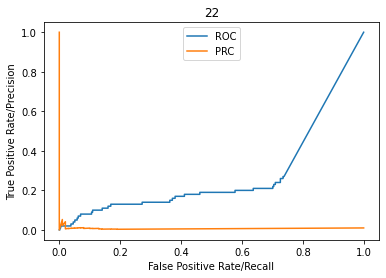

PRC AUC:0.007026604386673395
ROC AUC:0.2775580808080808


In [32]:
fpr23, tpr23, thresholds23 = roc_curve(Y_test[:,22], probs[:, 22])
prec23, recall23, thresholds23 = precision_recall_curve(Y_test[:,22], probs[:, 22])

plt.plot(fpr23,tpr23,label="ROC")
plt.plot(recall23,prec23,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('22')
plt.show()

print("PRC AUC:" + str(auc(recall23, prec23)))
print("ROC AUC:" + str(auc(fpr23, tpr23)))

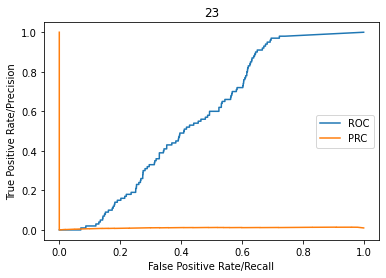

PRC AUC:0.010632390590341918
ROC AUC:0.5752909090909091


In [33]:
fpr24, tpr24, thresholds24 = roc_curve(Y_test[:,23], probs[:, 23])
prec24, recall24, thresholds24 = precision_recall_curve(Y_test[:,23], probs[:, 23])

plt.plot(fpr24,tpr24,label="ROC")
plt.plot(recall24,prec24,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('23')
plt.show()

print("PRC AUC:" + str(auc(recall24, prec24)))
print("ROC AUC:" + str(auc(fpr24, tpr24)))

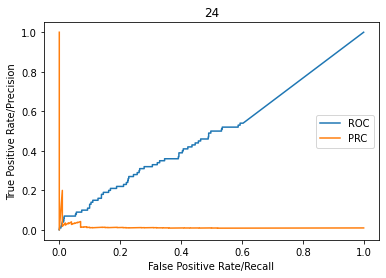

PRC AUC:0.01249006157670736
ROC AUC:0.4913333333333333


In [34]:
fpr25, tpr25, thresholds25 = roc_curve(Y_test[:,24], probs[:, 24])
prec25, recall25, thresholds25 = precision_recall_curve(Y_test[:,24], probs[:, 24])

plt.plot(fpr25,tpr25,label="ROC")
plt.plot(recall25,prec25,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('24')
plt.show()

print("PRC AUC:" + str(auc(recall25, prec25)))
print("ROC AUC:" + str(auc(fpr25, tpr25)))

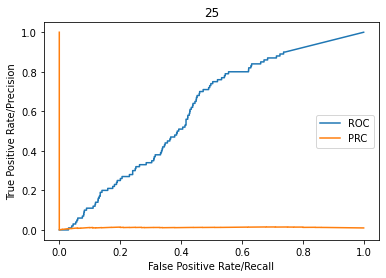

PRC AUC:0.012205277710940713
ROC AUC:0.6039156565656566


In [35]:
fpr26, tpr26, thresholds26 = roc_curve(Y_test[:,25], probs[:, 25])
prec26, recall26, thresholds26 = precision_recall_curve(Y_test[:,25], probs[:, 25])

plt.plot(fpr26,tpr26,label="ROC")
plt.plot(recall26,prec26,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('25')
plt.show()

print("PRC AUC:" + str(auc(recall26, prec26)))
print("ROC AUC:" + str(auc(fpr26, tpr26)))

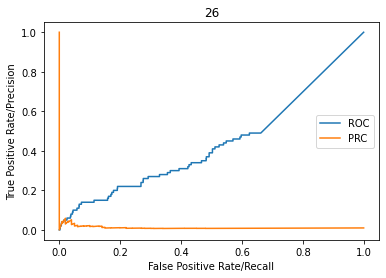

PRC AUC:0.011004527066751283
ROC AUC:0.4375924242424242


In [36]:
fpr27, tpr27, thresholds27 = roc_curve(Y_test[:,26], probs[:, 26])
prec27, recall27, thresholds27 = precision_recall_curve(Y_test[:,26], probs[:, 26])

plt.plot(fpr27,tpr27,label="ROC")
plt.plot(recall27,prec27,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('26')
plt.show()

print("PRC AUC:" + str(auc(recall27, prec27)))
print("ROC AUC:" + str(auc(fpr27, tpr27)))

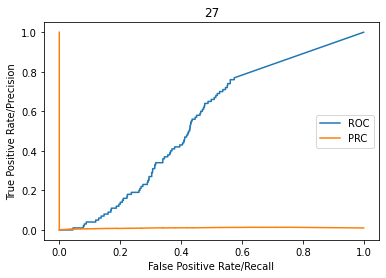

PRC AUC:0.010262668116208217
ROC AUC:0.5504686868686868


In [37]:
fpr28, tpr28, thresholds28 = roc_curve(Y_test[:,27], probs[:, 27])
prec28, recall28, thresholds28 = precision_recall_curve(Y_test[:,27], probs[:, 27])

plt.plot(fpr28,tpr28,label="ROC")
plt.plot(recall28,prec28,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('27')
plt.show()

print("PRC AUC:" + str(auc(recall28, prec28)))
print("ROC AUC:" + str(auc(fpr28, tpr28)))

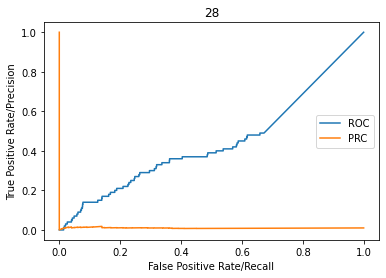

PRC AUC:0.009493747388770922
ROC AUC:0.44058383838383836


In [38]:
fpr29, tpr29, thresholds29 = roc_curve(Y_test[:,28], probs[:, 28])
prec29, recall29, thresholds29 = precision_recall_curve(Y_test[:,28], probs[:, 28])

plt.plot(fpr29,tpr29,label="ROC")
plt.plot(recall29,prec29,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('28')
plt.show()

print("PRC AUC:" + str(auc(recall29, prec29)))
print("ROC AUC:" + str(auc(fpr29, tpr29)))

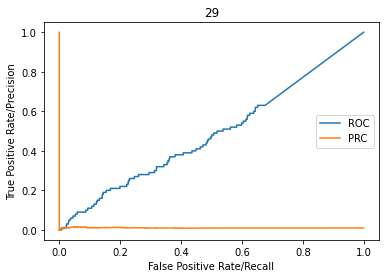

PRC AUC:0.010077715281988274
ROC AUC:0.4849560606060606


In [39]:
fpr30, tpr30, thresholds30 = roc_curve(Y_test[:,29], probs[:, 29])
prec30, recall30, thresholds30 = precision_recall_curve(Y_test[:,29], probs[:, 29])

plt.plot(fpr30,tpr30,label="ROC")
plt.plot(recall30,prec30,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('29')
plt.show()

print("PRC AUC:" + str(auc(recall30, prec30)))
print("ROC AUC:" + str(auc(fpr30, tpr30)))

### ROC and PRC Curve 30-39

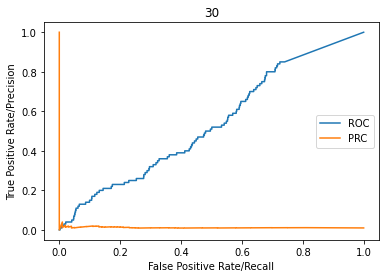

PRC AUC:0.011705416794517982
ROC AUC:0.5374025252525252


In [40]:
fpr31, tpr31, thresholds31 = roc_curve(Y_test[:,30], probs[:,30])
prec31, recall31, thresholds31 = precision_recall_curve(Y_test[:,30], probs[:,30])

plt.plot(fpr31,tpr31,label="ROC")
plt.plot(recall31,prec31,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('30')
plt.show()

print("PRC AUC:" + str(auc(recall31, prec31)))
print("ROC AUC:" + str(auc(fpr31, tpr31)))

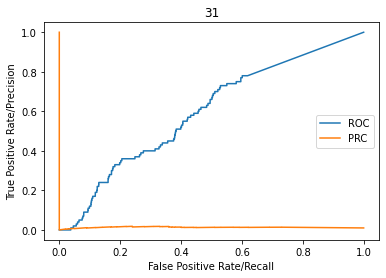

PRC AUC:0.012739583593986567
ROC AUC:0.5959525252525253


In [41]:
fpr32, tpr32, thresholds32 = roc_curve(Y_test[:,31], probs[:, 31])
prec32, recall32, thresholds32 = precision_recall_curve(Y_test[:,31], probs[:, 31])

plt.plot(fpr32,tpr32,label="ROC")
plt.plot(recall32,prec32,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('31')
plt.show()

print("PRC AUC:" + str(auc(recall32, prec32)))
print("ROC AUC:" + str(auc(fpr32, tpr32)))

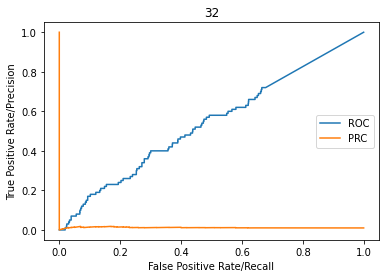

PRC AUC:0.011661430623432893
ROC AUC:0.5401323232323232


In [42]:
fpr33, tpr33, thresholds33 = roc_curve(Y_test[:,32], probs[:, 32])
prec33, recall33, thresholds33 = precision_recall_curve(Y_test[:,32], probs[:, 32])

plt.plot(fpr33,tpr33,label="ROC")
plt.plot(recall33,prec33,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('32')
plt.show()

print("PRC AUC:" + str(auc(recall33, prec33)))
print("ROC AUC:" + str(auc(fpr33, tpr33)))

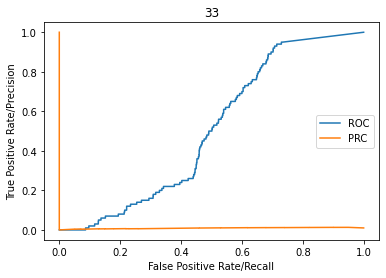

PRC AUC:0.00904474851133923
ROC AUC:0.5055242424242424


In [43]:
fpr34, tpr34, thresholds34 = roc_curve(Y_test[:,33], probs[:, 33])
prec34, recall34, thresholds34 = precision_recall_curve(Y_test[:,33], probs[:, 33])

plt.plot(fpr34,tpr34,label="ROC")
plt.plot(recall34,prec34,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('33')
plt.show()

print("PRC AUC:" + str(auc(recall34, prec34)))
print("ROC AUC:" + str(auc(fpr34, tpr34)))

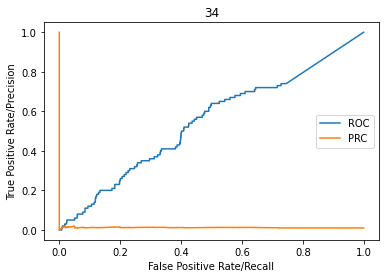

PRC AUC:0.01163074744546258
ROC AUC:0.5445858585858586


In [44]:
fpr35, tpr35, thresholds35 = roc_curve(Y_test[:,34], probs[:, 34])
prec35, recall35, thresholds35 = precision_recall_curve(Y_test[:,34], probs[:, 34])

plt.plot(fpr35,tpr35,label="ROC")
plt.plot(recall35,prec35,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('34')
plt.show()

print("PRC AUC:" + str(auc(recall35, prec35)))
print("ROC AUC:" + str(auc(fpr35, tpr35)))

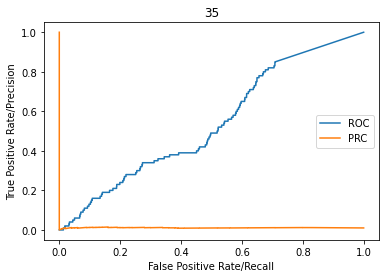

PRC AUC:0.010914049014876893
ROC AUC:0.537909595959596


In [45]:
fpr36, tpr36, thresholds36 = roc_curve(Y_test[:,35], probs[:, 35])
prec36, recall36, thresholds36 = precision_recall_curve(Y_test[:,35], probs[:, 35])

plt.plot(fpr36,tpr36,label="ROC")
plt.plot(recall36,prec36,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('35')
plt.show()

print("PRC AUC:" + str(auc(recall36, prec36)))
print("ROC AUC:" + str(auc(fpr36, tpr36)))

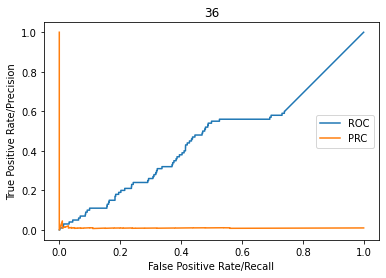

PRC AUC:0.009568186148914134
ROC AUC:0.46303838383838386


In [46]:
fpr37, tpr37, thresholds37 = roc_curve(Y_test[:,36], probs[:, 36])
prec37, recall37, thresholds37 = precision_recall_curve(Y_test[:,36], probs[:, 36])

plt.plot(fpr37,tpr37,label="ROC")
plt.plot(recall37,prec37,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('36')
plt.show()

print("PRC AUC:" + str(auc(recall37, prec37)))
print("ROC AUC:" + str(auc(fpr37, tpr37)))

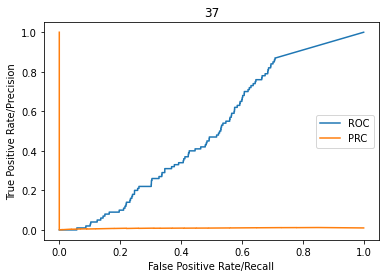

PRC AUC:0.009136658482550646
ROC AUC:0.505070202020202


In [47]:
fpr38, tpr38, thresholds38 = roc_curve(Y_test[:,37], probs[:, 37])
prec38, recall38, thresholds38 = precision_recall_curve(Y_test[:,37], probs[:, 37])

plt.plot(fpr38,tpr38,label="ROC")
plt.plot(recall38,prec38,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('37')
plt.show()

print("PRC AUC:" + str(auc(recall38, prec38)))
print("ROC AUC:" + str(auc(fpr38, tpr38)))

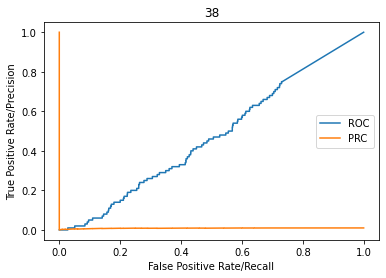

PRC AUC:0.00875045056759329
ROC AUC:0.47222070707070707


In [48]:
fpr39, tpr39, thresholds39 = roc_curve(Y_test[:,38], probs[:, 38])
prec39, recall39, thresholds39 = precision_recall_curve(Y_test[:,38], probs[:, 38])

plt.plot(fpr39,tpr39,label="ROC")
plt.plot(recall39,prec39,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('38')
plt.show()

print("PRC AUC:" + str(auc(recall39, prec39)))
print("ROC AUC:" + str(auc(fpr39, tpr39)))

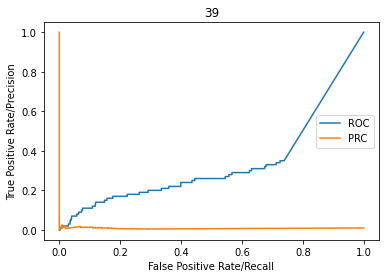

PRC AUC:0.007834291194092622
ROC AUC:0.3332924242424242


In [49]:
fpr40, tpr40, thresholds40 = roc_curve(Y_test[:,39], probs[:, 39])
prec40, recall40, thresholds40 = precision_recall_curve(Y_test[:,39], probs[:, 39])

plt.plot(fpr40,tpr40,label="ROC")
plt.plot(recall40,prec40,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('39')
plt.show()

print("PRC AUC:" + str(auc(recall40, prec40)))
print("ROC AUC:" + str(auc(fpr40, tpr40)))

### ROC and PRC Curve 40-49

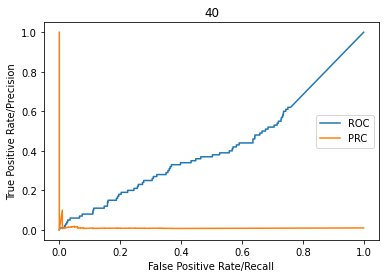

PRC AUC:0.009154423485838479
ROC AUC:0.42095404040404044


In [50]:
fpr41, tpr41, thresholds41 = roc_curve(Y_test[:,40], probs[:,40])
prec41, recall41, thresholds41 = precision_recall_curve(Y_test[:,40], probs[:,40])

plt.plot(fpr41,tpr41,label="ROC")
plt.plot(recall41,prec41,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('40')
plt.show()

print("PRC AUC:" + str(auc(recall41, prec41)))
print("ROC AUC:" + str(auc(fpr41, tpr41)))

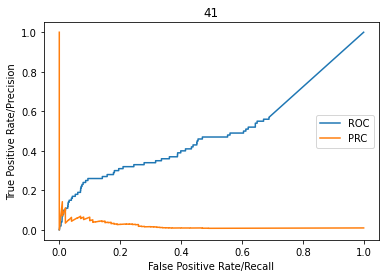

PRC AUC:0.018945968406098274
ROC AUC:0.49572828282828285


In [51]:
fpr42, tpr42, thresholds42 = roc_curve(Y_test[:,41], probs[:, 41])
prec42, recall42, thresholds42 = precision_recall_curve(Y_test[:,41], probs[:, 41])

plt.plot(fpr42,tpr42,label="ROC")
plt.plot(recall42,prec42,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('41')
plt.show()

print("PRC AUC:" + str(auc(recall42, prec42)))
print("ROC AUC:" + str(auc(fpr42, tpr42)))

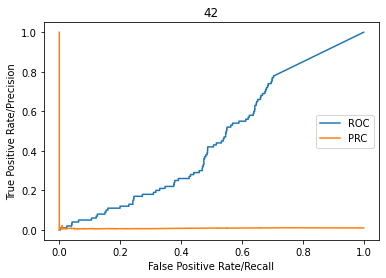

PRC AUC:0.008598620942537386
ROC AUC:0.45931868686868693


In [52]:
fpr43, tpr43, thresholds43 = roc_curve(Y_test[:,42], probs[:, 42])
prec43, recall43, thresholds43 = precision_recall_curve(Y_test[:,42], probs[:, 42])

plt.plot(fpr43,tpr43,label="ROC")
plt.plot(recall43,prec43,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('42')
plt.show()

print("PRC AUC:" + str(auc(recall43, prec43)))
print("ROC AUC:" + str(auc(fpr43, tpr43)))

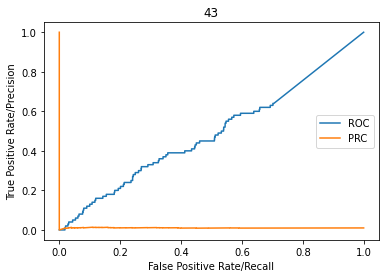

PRC AUC:0.010040213460950752
ROC AUC:0.488369696969697


In [53]:
fpr44, tpr44, thresholds44 = roc_curve(Y_test[:,43], probs[:, 43])
prec44, recall44, thresholds44 = precision_recall_curve(Y_test[:,43], probs[:, 43])

plt.plot(fpr44,tpr44,label="ROC")
plt.plot(recall44,prec44,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('43')
plt.show()

print("PRC AUC:" + str(auc(recall44, prec44)))
print("ROC AUC:" + str(auc(fpr44, tpr44)))

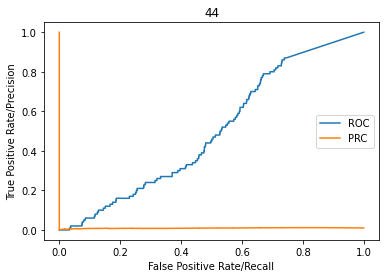

PRC AUC:0.009136570507038269
ROC AUC:0.49729747474747477


In [54]:
fpr45, tpr45, thresholds45 = roc_curve(Y_test[:,44], probs[:, 44])
prec45, recall45, thresholds45 = precision_recall_curve(Y_test[:,44], probs[:, 44])

plt.plot(fpr45,tpr45,label="ROC")
plt.plot(recall45,prec45,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('44')
plt.show()

print("PRC AUC:" + str(auc(recall45, prec45)))
print("ROC AUC:" + str(auc(fpr45, tpr45)))

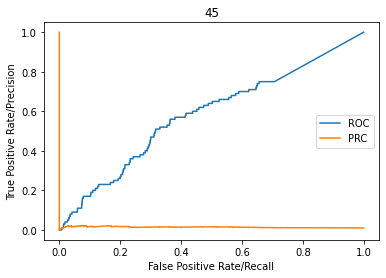

PRC AUC:0.013702850361400298
ROC AUC:0.582500505050505


In [55]:
fpr46, tpr46, thresholds46 = roc_curve(Y_test[:,45], probs[:, 45])
prec46, recall46, thresholds46 = precision_recall_curve(Y_test[:,45], probs[:, 45])

plt.plot(fpr46,tpr46,label="ROC")
plt.plot(recall46,prec46,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('45')
plt.show()

print("PRC AUC:" + str(auc(recall46, prec46)))
print("ROC AUC:" + str(auc(fpr46, tpr46)))

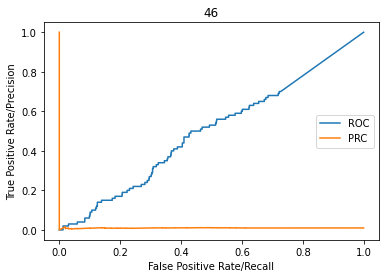

PRC AUC:0.009658356835011362
ROC AUC:0.495810101010101


In [56]:
fpr47, tpr47, thresholds47 = roc_curve(Y_test[:,46], probs[:, 46])
prec47, recall47, thresholds47 = precision_recall_curve(Y_test[:,46], probs[:, 46])

plt.plot(fpr47,tpr47,label="ROC")
plt.plot(recall47,prec47,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('46')
plt.show()

print("PRC AUC:" + str(auc(recall47, prec47)))
print("ROC AUC:" + str(auc(fpr47, tpr47)))

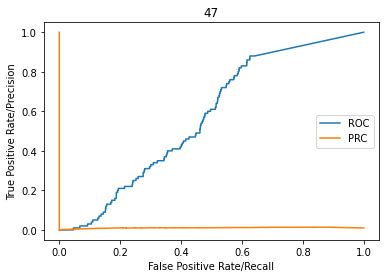

PRC AUC:0.0106879339258921
ROC AUC:0.5700919191919191


In [57]:
fpr48, tpr48, thresholds48 = roc_curve(Y_test[:,47], probs[:, 47])
prec48, recall48, thresholds48 = precision_recall_curve(Y_test[:,47], probs[:, 47])

plt.plot(fpr48,tpr48,label="ROC")
plt.plot(recall48,prec48,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('47')
plt.show()

print("PRC AUC:" + str(auc(recall48, prec48)))
print("ROC AUC:" + str(auc(fpr48, tpr48)))

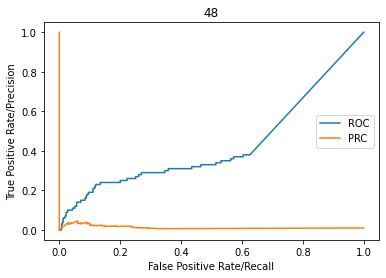

PRC AUC:0.01197342450007164
ROC AUC:0.4260631313131312


In [58]:
fpr49, tpr49, thresholds49 = roc_curve(Y_test[:,48], probs[:, 48])
prec49, recall49, thresholds49 = precision_recall_curve(Y_test[:,48], probs[:, 48])

plt.plot(fpr49,tpr49,label="ROC")
plt.plot(recall49,prec49,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('48')
plt.show()

print("PRC AUC:" + str(auc(recall49, prec49)))
print("ROC AUC:" + str(auc(fpr49, tpr49)))

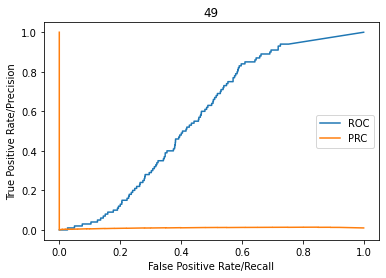

PRC AUC:0.010599722005968816
ROC AUC:0.5727868686868686


In [59]:
fpr50, tpr50, thresholds50 = roc_curve(Y_test[:,49], probs[:, 49])
prec50, recall50, thresholds50 = precision_recall_curve(Y_test[:,49], probs[:, 49])

plt.plot(fpr50,tpr50,label="ROC")
plt.plot(recall50,prec50,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('49')
plt.show()

print("PRC AUC:" + str(auc(recall50, prec50)))
print("ROC AUC:" + str(auc(fpr50, tpr50)))

## 50-99

### ROC and PRC Curves 50-59 

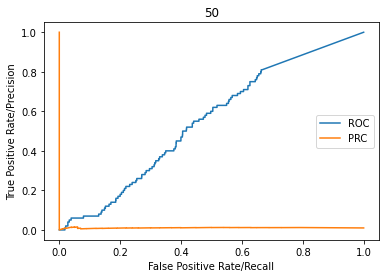

PRC AUC:0.010685191102970693
ROC AUC:0.5496161616161616


In [60]:
fpr51, tpr51, thresholds51 = roc_curve(Y_test[:,50], probs[:,50])
prec51, recall51, thresholds51 = precision_recall_curve(Y_test[:,50], probs[:,50])

plt.plot(fpr51,tpr51,label="ROC")
plt.plot(recall51,prec51,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('50')
plt.show()

print("PRC AUC:" + str(auc(recall51, prec51)))
print("ROC AUC:" + str(auc(fpr51, tpr51)))

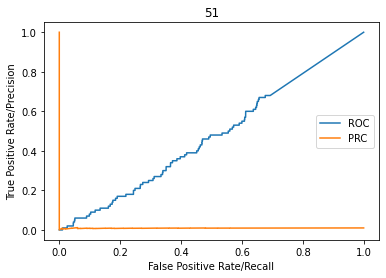

PRC AUC:0.009087833792257385
ROC AUC:0.47497979797979806


In [61]:
fpr52, tpr52, thresholds52 = roc_curve(Y_test[:,51], probs[:, 51])
prec52, recall52, thresholds52 = precision_recall_curve(Y_test[:,51], probs[:, 51])

plt.plot(fpr52,tpr52,label="ROC")
plt.plot(recall52,prec52,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('51')
plt.show()

print("PRC AUC:" + str(auc(recall52, prec52)))
print("ROC AUC:" + str(auc(fpr52, tpr52)))

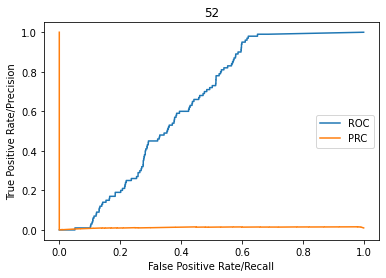

PRC AUC:0.01249861876955858
ROC AUC:0.6377717171717172


In [62]:
fpr53, tpr53, thresholds53 = roc_curve(Y_test[:,52], probs[:, 52])
prec53, recall53, thresholds53 = precision_recall_curve(Y_test[:,52], probs[:, 52])

plt.plot(fpr53,tpr53,label="ROC")
plt.plot(recall53,prec53,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('52')
plt.show()

print("PRC AUC:" + str(auc(recall53, prec53)))
print("ROC AUC:" + str(auc(fpr53, tpr53)))

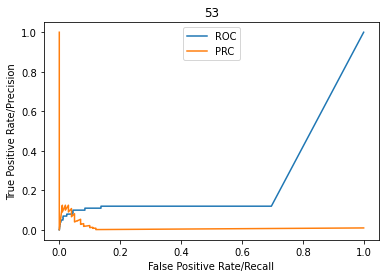

PRC AUC:0.011577914606448393
ROC AUC:0.2497010101010101


In [63]:
fpr54, tpr54, thresholds54 = roc_curve(Y_test[:,53], probs[:, 53])
prec54, recall54, thresholds54 = precision_recall_curve(Y_test[:,53], probs[:, 53])

plt.plot(fpr54,tpr54,label="ROC")
plt.plot(recall54,prec54,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('53')
plt.show()

print("PRC AUC:" + str(auc(recall54, prec54)))
print("ROC AUC:" + str(auc(fpr54, tpr54)))

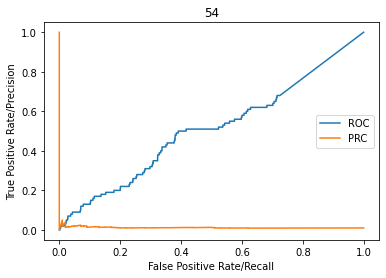

PRC AUC:0.011607616088428852
ROC AUC:0.5074515151515152


In [64]:
fpr55, tpr55, thresholds55 = roc_curve(Y_test[:,54], probs[:, 54])
prec55, recall55, thresholds55 = precision_recall_curve(Y_test[:,54], probs[:, 54])

plt.plot(fpr55,tpr55,label="ROC")
plt.plot(recall55,prec55,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('54')
plt.show()

print("PRC AUC:" + str(auc(recall55, prec55)))
print("ROC AUC:" + str(auc(fpr55, tpr55)))

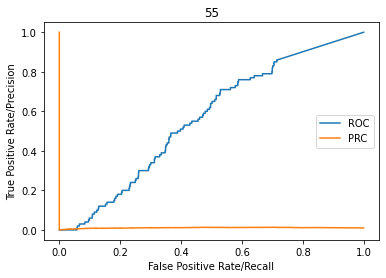

PRC AUC:0.010736188843929309
ROC AUC:0.5635287878787878


In [65]:
fpr56, tpr56, thresholds56 = roc_curve(Y_test[:,55], probs[:, 55])
prec56, recall56, thresholds56 = precision_recall_curve(Y_test[:,55], probs[:, 55])

plt.plot(fpr56,tpr56,label="ROC")
plt.plot(recall56,prec56,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('55')
plt.show()

print("PRC AUC:" + str(auc(recall56, prec56)))
print("ROC AUC:" + str(auc(fpr56, tpr56)))

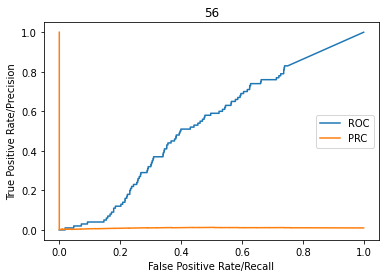

PRC AUC:0.009941827072824747
ROC AUC:0.5308545454545455


In [66]:
fpr57, tpr57, thresholds57 = roc_curve(Y_test[:,56], probs[:, 56])
prec57, recall57, thresholds57 = precision_recall_curve(Y_test[:,56], probs[:, 56])

plt.plot(fpr57,tpr57,label="ROC")
plt.plot(recall57,prec57,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('56')
plt.show()

print("PRC AUC:" + str(auc(recall57, prec57)))
print("ROC AUC:" + str(auc(fpr57, tpr57)))

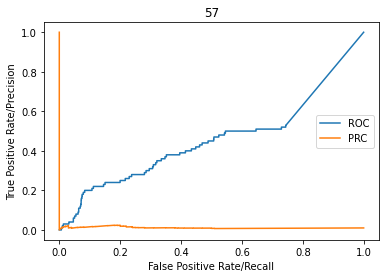

PRC AUC:0.010864157133759461
ROC AUC:0.45472525252525253


In [67]:
fpr58, tpr58, thresholds58 = roc_curve(Y_test[:,57], probs[:, 57])
prec58, recall58, thresholds58 = precision_recall_curve(Y_test[:,57], probs[:, 57])

plt.plot(fpr58,tpr58,label="ROC")
plt.plot(recall58,prec58,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('57')
plt.show()

print("PRC AUC:" + str(auc(recall58, prec58)))
print("ROC AUC:" + str(auc(fpr58, tpr58)))

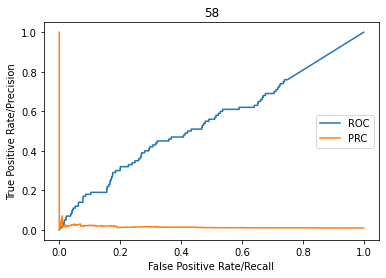

PRC AUC:0.013662736968329137
ROC AUC:0.5461833333333332


In [68]:
fpr59, tpr59, thresholds59 = roc_curve(Y_test[:,58], probs[:, 58])
prec59, recall59, thresholds59 = precision_recall_curve(Y_test[:,58], probs[:, 58])

plt.plot(fpr59,tpr59,label="ROC")
plt.plot(recall59,prec59,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('58')
plt.show()

print("PRC AUC:" + str(auc(recall59, prec59)))
print("ROC AUC:" + str(auc(fpr59, tpr59)))

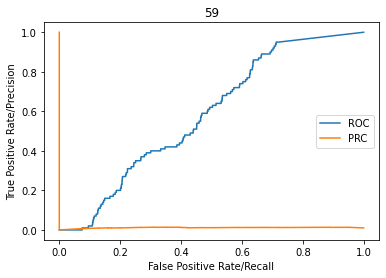

PRC AUC:0.011257941263133928
ROC AUC:0.5848257575757575


In [69]:
fpr60, tpr60, thresholds60 = roc_curve(Y_test[:,59], probs[:, 59])
prec60, recall60, thresholds60 = precision_recall_curve(Y_test[:,59], probs[:, 59])

plt.plot(fpr60,tpr60,label="ROC")
plt.plot(recall60,prec60,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('59')
plt.show()

print("PRC AUC:" + str(auc(recall60, prec60)))
print("ROC AUC:" + str(auc(fpr60, tpr60)))

### ROC and PRC Curve 60-69

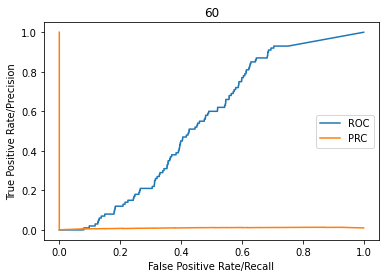

PRC AUC:0.009970529518678273
ROC AUC:0.5478636363636364


In [70]:
fpr61, tpr61, thresholds61 = roc_curve(Y_test[:,60], probs[:,60])
prec61, recall61, thresholds61 = precision_recall_curve(Y_test[:,60], probs[:,60])

plt.plot(fpr61,tpr61,label="ROC")
plt.plot(recall61,prec61,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('60')
plt.show()

print("PRC AUC:" + str(auc(recall61, prec61)))
print("ROC AUC:" + str(auc(fpr61, tpr61)))

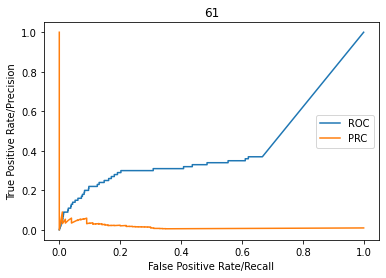

PRC AUC:0.014437060450412825
ROC AUC:0.41870303030303035


In [71]:
fpr62, tpr62, thresholds62 = roc_curve(Y_test[:,61], probs[:, 61])
prec62, recall62, thresholds62 = precision_recall_curve(Y_test[:,61], probs[:, 61])

plt.plot(fpr62,tpr62,label="ROC")
plt.plot(recall62,prec62,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('61')
plt.show()

print("PRC AUC:" + str(auc(recall62, prec62)))
print("ROC AUC:" + str(auc(fpr62, tpr62)))

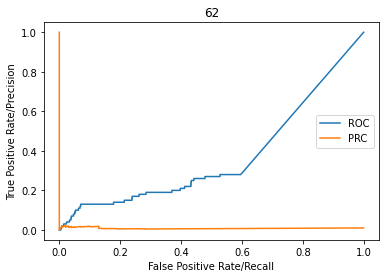

PRC AUC:0.00826094195970187
ROC AUC:0.3668484848484848


In [72]:
fpr63, tpr63, thresholds63 = roc_curve(Y_test[:,62], probs[:, 62])
prec63, recall63, thresholds63 = precision_recall_curve(Y_test[:,62], probs[:, 62])

plt.plot(fpr63,tpr63,label="ROC")
plt.plot(recall63,prec63,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('62')
plt.show()

print("PRC AUC:" + str(auc(recall63, prec63)))
print("ROC AUC:" + str(auc(fpr63, tpr63)))

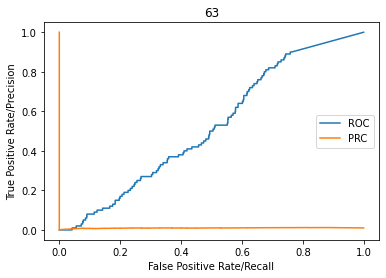

PRC AUC:0.009701960020967227
ROC AUC:0.523020202020202


In [73]:
fpr64, tpr64, thresholds64 = roc_curve(Y_test[:,63], probs[:, 63])
prec64, recall64, thresholds64 = precision_recall_curve(Y_test[:,63], probs[:, 63])

plt.plot(fpr64,tpr64,label="ROC")
plt.plot(recall64,prec64,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('63')
plt.show()

print("PRC AUC:" + str(auc(recall64, prec64)))
print("ROC AUC:" + str(auc(fpr64, tpr64)))

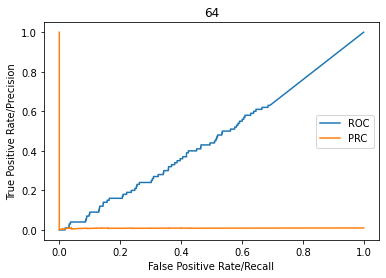

PRC AUC:0.008907780330552032
ROC AUC:0.4638287878787879


In [74]:
fpr65, tpr65, thresholds65 = roc_curve(Y_test[:,64], probs[:, 64])
prec65, recall65, thresholds65 = precision_recall_curve(Y_test[:,64], probs[:, 64])

plt.plot(fpr65,tpr65,label="ROC")
plt.plot(recall65,prec65,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('64')
plt.show()

print("PRC AUC:" + str(auc(recall65, prec65)))
print("ROC AUC:" + str(auc(fpr65, tpr65)))

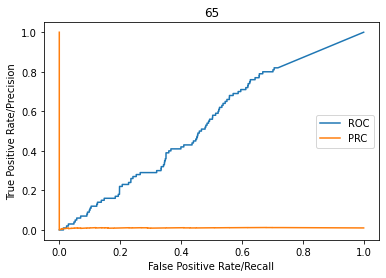

PRC AUC:0.010542639742077996
ROC AUC:0.5410808080808082


In [75]:
fpr66, tpr66, thresholds66 = roc_curve(Y_test[:,65], probs[:, 65])
prec66, recall66, thresholds66 = precision_recall_curve(Y_test[:,65], probs[:, 65])

plt.plot(fpr66,tpr66,label="ROC")
plt.plot(recall66,prec66,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('65')
plt.show()

print("PRC AUC:" + str(auc(recall66, prec66)))
print("ROC AUC:" + str(auc(fpr66, tpr66)))

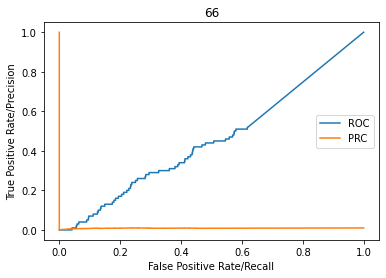

PRC AUC:0.008631996846221932
ROC AUC:0.45401919191919193


In [76]:
fpr67, tpr67, thresholds67 = roc_curve(Y_test[:,66], probs[:, 66])
prec67, recall67, thresholds67 = precision_recall_curve(Y_test[:,66], probs[:, 66])

plt.plot(fpr67,tpr67,label="ROC")
plt.plot(recall67,prec67,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('66')
plt.show()

print("PRC AUC:" + str(auc(recall67, prec67)))
print("ROC AUC:" + str(auc(fpr67, tpr67)))

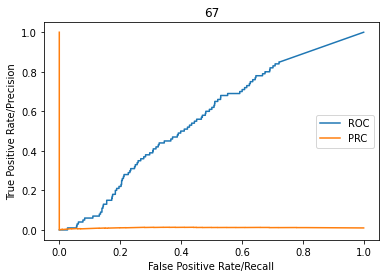

PRC AUC:0.01104564489305453
ROC AUC:0.5664176767676768


In [77]:
fpr68, tpr68, thresholds68 = roc_curve(Y_test[:,67], probs[:, 67])
prec68, recall68, thresholds68 = precision_recall_curve(Y_test[:,67], probs[:, 67])

plt.plot(fpr68,tpr68,label="ROC")
plt.plot(recall68,prec68,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('67')
plt.show()

print("PRC AUC:" + str(auc(recall68, prec68)))
print("ROC AUC:" + str(auc(fpr68, tpr68)))

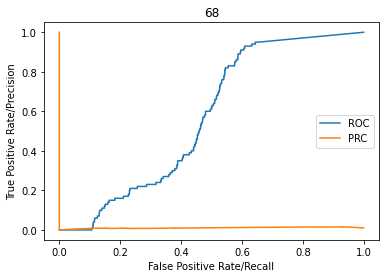

PRC AUC:0.010547353431741272
ROC AUC:0.5715186868686869


In [78]:
fpr69, tpr69, thresholds69 = roc_curve(Y_test[:,68], probs[:, 68])
prec69, recall69, thresholds69 = precision_recall_curve(Y_test[:,68], probs[:, 68])

plt.plot(fpr69,tpr69,label="ROC")
plt.plot(recall69,prec69,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('68')
plt.show()

print("PRC AUC:" + str(auc(recall69, prec69)))
print("ROC AUC:" + str(auc(fpr69, tpr69)))

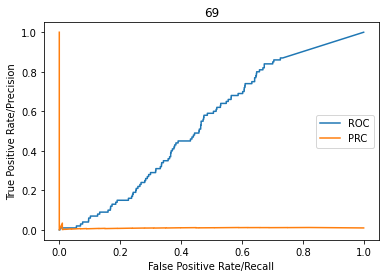

PRC AUC:0.010130930074820714
ROC AUC:0.5396939393939394


In [79]:
fpr70, tpr70, thresholds70 = roc_curve(Y_test[:,69], probs[:, 69])
prec70, recall70, thresholds70 = precision_recall_curve(Y_test[:,69], probs[:, 69])

plt.plot(fpr70,tpr70,label="ROC")
plt.plot(recall70,prec70,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('69')
plt.show()

print("PRC AUC:" + str(auc(recall70, prec70)))
print("ROC AUC:" + str(auc(fpr70, tpr70)))

### ROC and PRC Curve 70-79

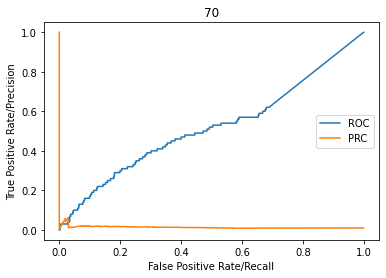

PRC AUC:0.01293249913004034
ROC AUC:0.5165272727272728


In [80]:
fpr71, tpr71, thresholds71 = roc_curve(Y_test[:,70], probs[:,70])
prec71, recall71, thresholds71 = precision_recall_curve(Y_test[:,70], probs[:,70])

plt.plot(fpr71,tpr71,label="ROC")
plt.plot(recall71,prec71,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('70')
plt.show()

print("PRC AUC:" + str(auc(recall71, prec71)))
print("ROC AUC:" + str(auc(fpr71, tpr71)))

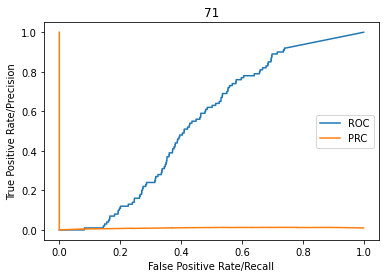

PRC AUC:0.009988600946630222
ROC AUC:0.5461878787878788


In [81]:
fpr72, tpr72, thresholds72 = roc_curve(Y_test[:,71], probs[:, 71])
prec72, recall72, thresholds72 = precision_recall_curve(Y_test[:,71], probs[:, 71])

plt.plot(fpr72,tpr72,label="ROC")
plt.plot(recall72,prec72,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('71')
plt.show()

print("PRC AUC:" + str(auc(recall72, prec72)))
print("ROC AUC:" + str(auc(fpr72, tpr72)))

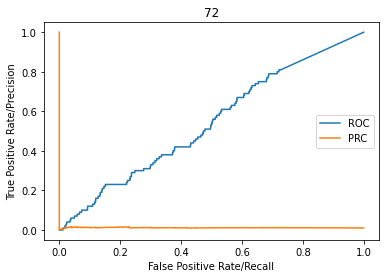

PRC AUC:0.011204179727463511
ROC AUC:0.5407929292929293


In [82]:
fpr73, tpr73, thresholds73 = roc_curve(Y_test[:,72], probs[:, 72])
prec73, recall73, thresholds73 = precision_recall_curve(Y_test[:,72], probs[:, 72])

plt.plot(fpr73,tpr73,label="ROC")
plt.plot(recall73,prec73,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('72')
plt.show()

print("PRC AUC:" + str(auc(recall73, prec73)))
print("ROC AUC:" + str(auc(fpr73, tpr73)))

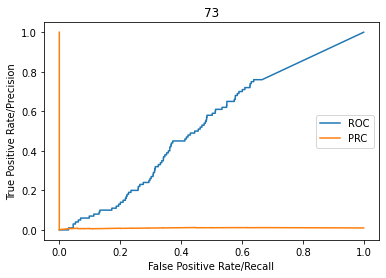

PRC AUC:0.009912177480247784
ROC AUC:0.5277252525252525


In [83]:
fpr74, tpr74, thresholds74 = roc_curve(Y_test[:,73], probs[:, 73])
prec74, recall74, thresholds74 = precision_recall_curve(Y_test[:,73], probs[:, 73])

plt.plot(fpr74,tpr74,label="ROC")
plt.plot(recall74,prec74,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('73')
plt.show()

print("PRC AUC:" + str(auc(recall74, prec74)))
print("ROC AUC:" + str(auc(fpr74, tpr74)))

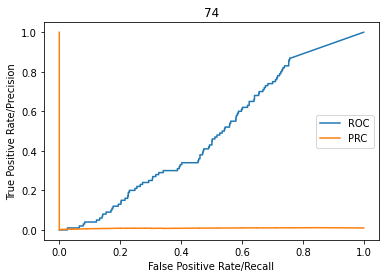

PRC AUC:0.008912546450378282
ROC AUC:0.4879424242424242


In [84]:
fpr75, tpr75, thresholds75 = roc_curve(Y_test[:,74], probs[:, 74])
prec75, recall75, thresholds75 = precision_recall_curve(Y_test[:,74], probs[:, 74])

plt.plot(fpr75,tpr75,label="ROC")
plt.plot(recall75,prec75,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('74')
plt.show()

print("PRC AUC:" + str(auc(recall75, prec75)))
print("ROC AUC:" + str(auc(fpr75, tpr75)))

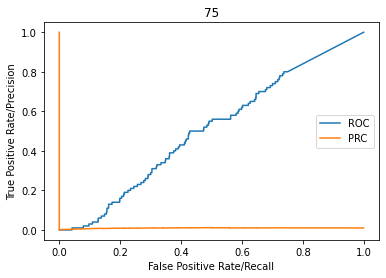

PRC AUC:0.00939514434413155
ROC AUC:0.5052474747474748


In [85]:
fpr76, tpr76, thresholds76 = roc_curve(Y_test[:,75], probs[:, 75])
prec76, recall76, thresholds76 = precision_recall_curve(Y_test[:,75], probs[:, 75])

plt.plot(fpr76,tpr76,label="ROC")
plt.plot(recall76,prec76,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('75')
plt.show()

print("PRC AUC:" + str(auc(recall76, prec76)))
print("ROC AUC:" + str(auc(fpr76, tpr76)))

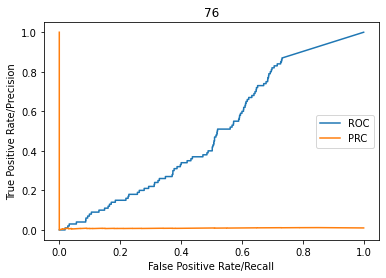

PRC AUC:0.009183221024409676
ROC AUC:0.4955949494949496


In [86]:
fpr77, tpr77, thresholds77 = roc_curve(Y_test[:,76], probs[:, 76])
prec77, recall77, thresholds77 = precision_recall_curve(Y_test[:,76], probs[:, 76])

plt.plot(fpr77,tpr77,label="ROC")
plt.plot(recall77,prec77,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('76')
plt.show()

print("PRC AUC:" + str(auc(recall77, prec77)))
print("ROC AUC:" + str(auc(fpr77, tpr77)))

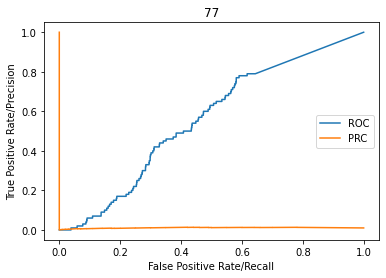

PRC AUC:0.01061102735985947
ROC AUC:0.5580969696969696


In [87]:
fpr78, tpr78, thresholds78 = roc_curve(Y_test[:,77], probs[:, 77])
prec78, recall78, thresholds78 = precision_recall_curve(Y_test[:,77], probs[:, 77])

plt.plot(fpr78,tpr78,label="ROC")
plt.plot(recall78,prec78,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('77')
plt.show()

print("PRC AUC:" + str(auc(recall78, prec78)))
print("ROC AUC:" + str(auc(fpr78, tpr78)))

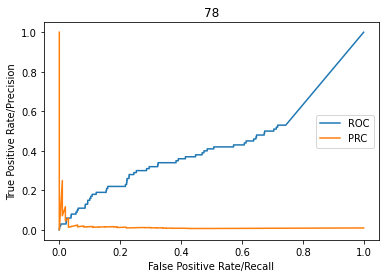

PRC AUC:0.012558081745475118
ROC AUC:0.4357343434343435


In [88]:
fpr79, tpr79, thresholds79 = roc_curve(Y_test[:,78], probs[:, 78])
prec79, recall79, thresholds79 = precision_recall_curve(Y_test[:,78], probs[:, 78])

plt.plot(fpr79,tpr79,label="ROC")
plt.plot(recall79,prec79,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('78')
plt.show()

print("PRC AUC:" + str(auc(recall79, prec79)))
print("ROC AUC:" + str(auc(fpr79, tpr79)))

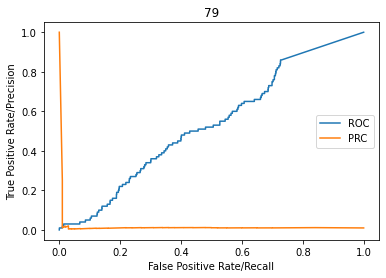

PRC AUC:0.016630814364070653
ROC AUC:0.53345


In [89]:
fpr80, tpr80, thresholds80 = roc_curve(Y_test[:,79], probs[:, 79])
prec80, recall80, thresholds80 = precision_recall_curve(Y_test[:,79], probs[:, 79])

plt.plot(fpr80,tpr80,label="ROC")
plt.plot(recall80,prec80,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('79')
plt.show()

print("PRC AUC:" + str(auc(recall80, prec80)))
print("ROC AUC:" + str(auc(fpr80, tpr80)))

### ROC and PRC Curve 80-89

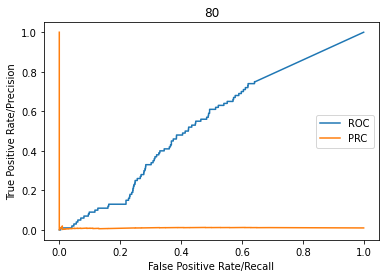

PRC AUC:0.010418673519443093
ROC AUC:0.540789898989899


In [90]:
fpr81, tpr81, thresholds81 = roc_curve(Y_test[:,80], probs[:,80])
prec81, recall81, thresholds81 = precision_recall_curve(Y_test[:,80], probs[:,80])

plt.plot(fpr81,tpr81,label="ROC")
plt.plot(recall81,prec81,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('80')
plt.show()

print("PRC AUC:" + str(auc(recall81, prec81)))
print("ROC AUC:" + str(auc(fpr81, tpr81)))

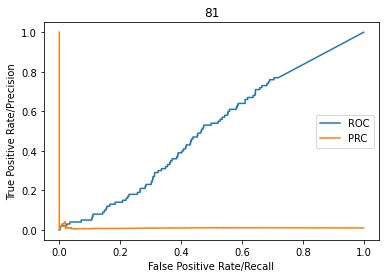

PRC AUC:0.00987207528138948
ROC AUC:0.5038090909090909


In [91]:
fpr82, tpr82, thresholds82 = roc_curve(Y_test[:,81], probs[:, 81])
prec82, recall82, thresholds82 = precision_recall_curve(Y_test[:,81], probs[:, 81])

plt.plot(fpr82,tpr82,label="ROC")
plt.plot(recall82,prec82,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('81')
plt.show()

print("PRC AUC:" + str(auc(recall82, prec82)))
print("ROC AUC:" + str(auc(fpr82, tpr82)))

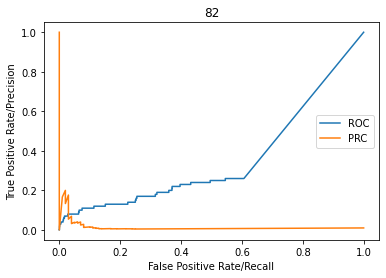

PRC AUC:0.012838095553716608
ROC AUC:0.35424646464646464


In [92]:
fpr83, tpr83, thresholds83 = roc_curve(Y_test[:,82], probs[:, 82])
prec83, recall83, thresholds83 = precision_recall_curve(Y_test[:,82], probs[:, 82])

plt.plot(fpr83,tpr83,label="ROC")
plt.plot(recall83,prec83,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('82')
plt.show()

print("PRC AUC:" + str(auc(recall83, prec83)))
print("ROC AUC:" + str(auc(fpr83, tpr83)))

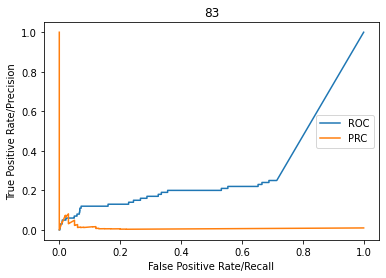

PRC AUC:0.00912643394136154
ROC AUC:0.29982878787878786


In [93]:
fpr84, tpr84, thresholds84 = roc_curve(Y_test[:,83], probs[:, 83])
prec84, recall84, thresholds84 = precision_recall_curve(Y_test[:,83], probs[:, 83])

plt.plot(fpr84,tpr84,label="ROC")
plt.plot(recall84,prec84,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('83')
plt.show()

print("PRC AUC:" + str(auc(recall84, prec84)))
print("ROC AUC:" + str(auc(fpr84, tpr84)))

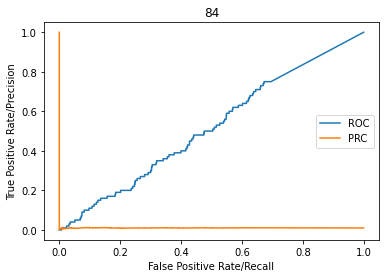

PRC AUC:0.010210829554889955
ROC AUC:0.5173196969696969


In [94]:
fpr85, tpr85, thresholds85 = roc_curve(Y_test[:,84], probs[:, 84])
prec85, recall85, thresholds85 = precision_recall_curve(Y_test[:,84], probs[:, 84])

plt.plot(fpr85,tpr85,label="ROC")
plt.plot(recall85,prec85,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('84')
plt.show()

print("PRC AUC:" + str(auc(recall85, prec85)))
print("ROC AUC:" + str(auc(fpr85, tpr85)))

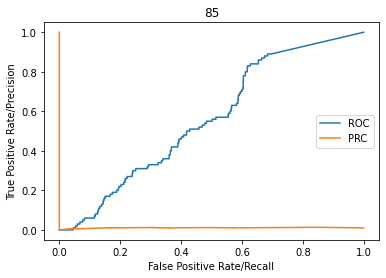

PRC AUC:0.010729964857935259
ROC AUC:0.561800505050505


In [95]:
fpr86, tpr86, thresholds86 = roc_curve(Y_test[:,85], probs[:, 85])
prec86, recall86, thresholds86 = precision_recall_curve(Y_test[:,85], probs[:, 85])

plt.plot(fpr86,tpr86,label="ROC")
plt.plot(recall86,prec86,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('85')
plt.show()

print("PRC AUC:" + str(auc(recall86, prec86)))
print("ROC AUC:" + str(auc(fpr86, tpr86)))

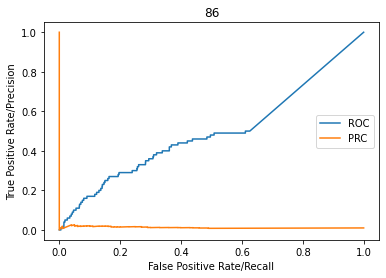

PRC AUC:0.011794742808886361
ROC AUC:0.49201616161616163


In [96]:
fpr87, tpr87, thresholds87 = roc_curve(Y_test[:,86], probs[:, 86])
prec87, recall87, thresholds87 = precision_recall_curve(Y_test[:,86], probs[:, 86])

plt.plot(fpr87,tpr87,label="ROC")
plt.plot(recall87,prec87,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('86')
plt.show()

print("PRC AUC:" + str(auc(recall87, prec87)))
print("ROC AUC:" + str(auc(fpr87, tpr87)))

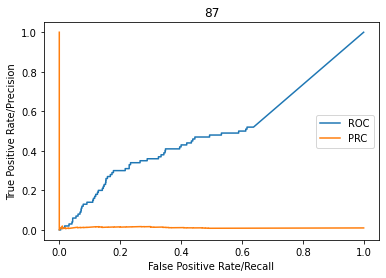

PRC AUC:0.01090949388595303
ROC AUC:0.4910833333333333


In [97]:
fpr88, tpr88, thresholds88 = roc_curve(Y_test[:,87], probs[:, 87])
prec88, recall88, thresholds88 = precision_recall_curve(Y_test[:,87], probs[:, 87])

plt.plot(fpr88,tpr88,label="ROC")
plt.plot(recall88,prec88,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('87')
plt.show()

print("PRC AUC:" + str(auc(recall88, prec88)))
print("ROC AUC:" + str(auc(fpr88, tpr88)))

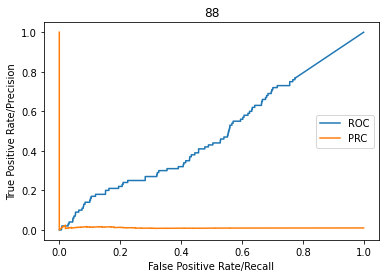

PRC AUC:0.010321559929294444
ROC AUC:0.4855429292929293


In [98]:
fpr89, tpr89, thresholds89 = roc_curve(Y_test[:,88], probs[:, 88])
prec89, recall89, thresholds89 = precision_recall_curve(Y_test[:,88], probs[:, 88])

plt.plot(fpr89,tpr89,label="ROC")
plt.plot(recall89,prec89,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('88')
plt.show()

print("PRC AUC:" + str(auc(recall89, prec89)))
print("ROC AUC:" + str(auc(fpr89, tpr89)))

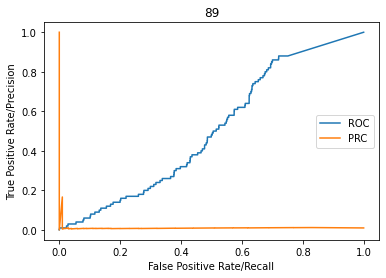

PRC AUC:0.010148184248829887
ROC AUC:0.5047277777777778


In [99]:
fpr90, tpr90, thresholds90 = roc_curve(Y_test[:,89], probs[:, 89])
prec90, recall90, thresholds90 = precision_recall_curve(Y_test[:,89], probs[:, 89])

plt.plot(fpr90,tpr90,label="ROC")
plt.plot(recall90,prec90,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('89')
plt.show()

print("PRC AUC:" + str(auc(recall90, prec90)))
print("ROC AUC:" + str(auc(fpr90, tpr90)))

### ROC and PRC Curve 90-99

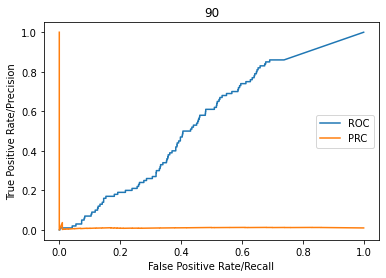

PRC AUC:0.010644983113006375
ROC AUC:0.5527924242424244


In [100]:
fpr91, tpr91, thresholds91 = roc_curve(Y_test[:,90], probs[:,90])
prec91, recall91, thresholds91 = precision_recall_curve(Y_test[:,90], probs[:,90])

plt.plot(fpr91,tpr91,label="ROC")
plt.plot(recall91,prec91,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('90')
plt.show()

print("PRC AUC:" + str(auc(recall91, prec91)))
print("ROC AUC:" + str(auc(fpr91, tpr91)))

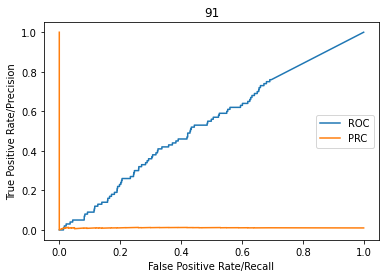

PRC AUC:0.010703700179439765
ROC AUC:0.5358681818181817


In [101]:
fpr92, tpr92, thresholds92 = roc_curve(Y_test[:,91], probs[:, 91])
prec92, recall92, thresholds92 = precision_recall_curve(Y_test[:,91], probs[:, 91])

plt.plot(fpr92,tpr92,label="ROC")
plt.plot(recall92,prec92,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('91')
plt.show()

print("PRC AUC:" + str(auc(recall92, prec92)))
print("ROC AUC:" + str(auc(fpr92, tpr92)))

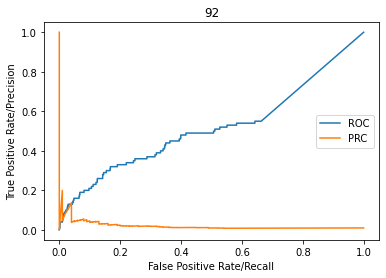

PRC AUC:0.018972825762122794
ROC AUC:0.5154464646464647


In [102]:
fpr93, tpr93, thresholds93 = roc_curve(Y_test[:,92], probs[:, 92])
prec93, recall93, thresholds93 = precision_recall_curve(Y_test[:,92], probs[:, 92])

plt.plot(fpr93,tpr93,label="ROC")
plt.plot(recall93,prec93,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('92')
plt.show()

print("PRC AUC:" + str(auc(recall93, prec93)))
print("ROC AUC:" + str(auc(fpr93, tpr93)))

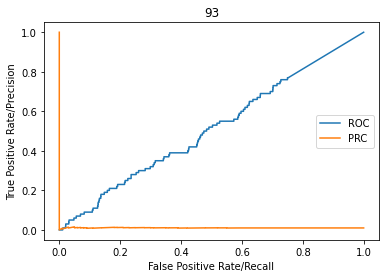

PRC AUC:0.010387816818339453
ROC AUC:0.5109838383838384


In [103]:
fpr94, tpr94, thresholds94 = roc_curve(Y_test[:,93], probs[:, 93])
prec94, recall94, thresholds94 = precision_recall_curve(Y_test[:,93], probs[:, 93])

plt.plot(fpr94,tpr94,label="ROC")
plt.plot(recall94,prec94,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('93')
plt.show()

print("PRC AUC:" + str(auc(recall94, prec94)))
print("ROC AUC:" + str(auc(fpr94, tpr94)))

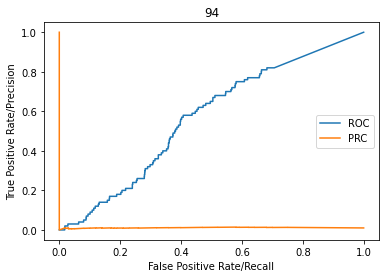

PRC AUC:0.011050362830679075
ROC AUC:0.5660388888888889


In [104]:
fpr95, tpr95, thresholds95 = roc_curve(Y_test[:,94], probs[:, 94])
prec95, recall95, thresholds95 = precision_recall_curve(Y_test[:,94], probs[:, 94])

plt.plot(fpr95,tpr95,label="ROC")
plt.plot(recall95,prec95,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('94')
plt.show()

print("PRC AUC:" + str(auc(recall95, prec95)))
print("ROC AUC:" + str(auc(fpr95, tpr95)))

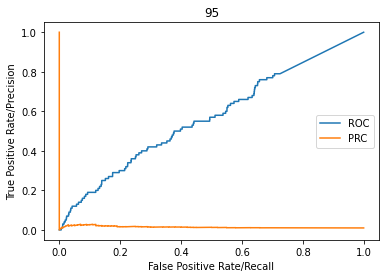

PRC AUC:0.014132596944391049
ROC AUC:0.5697843434343435


In [105]:
fpr96, tpr96, thresholds96 = roc_curve(Y_test[:,95], probs[:, 95])
prec96, recall96, thresholds96 = precision_recall_curve(Y_test[:,95], probs[:, 95])

plt.plot(fpr96,tpr96,label="ROC")
plt.plot(recall96,prec96,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('95')
plt.show()

print("PRC AUC:" + str(auc(recall96, prec96)))
print("ROC AUC:" + str(auc(fpr96, tpr96)))

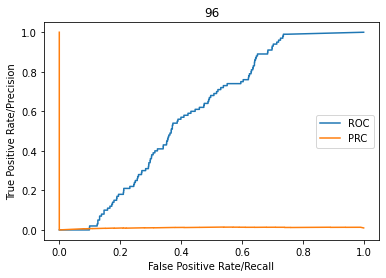

PRC AUC:0.011248916099937363
ROC AUC:0.5950348484848484


In [106]:
fpr97, tpr97, thresholds97 = roc_curve(Y_test[:,96], probs[:, 96])
prec97, recall97, thresholds97 = precision_recall_curve(Y_test[:,96], probs[:, 96])

plt.plot(fpr97,tpr97,label="ROC")
plt.plot(recall97,prec97,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('96')
plt.show()

print("PRC AUC:" + str(auc(recall97, prec97)))
print("ROC AUC:" + str(auc(fpr97, tpr97)))

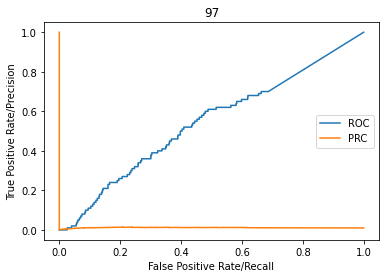

PRC AUC:0.011103499865915273
ROC AUC:0.5412878787878788


In [107]:
fpr98, tpr98, thresholds28 = roc_curve(Y_test[:,97], probs[:, 97])
prec98, recall98, thresholds28 = precision_recall_curve(Y_test[:,97], probs[:, 97])

plt.plot(fpr98,tpr98,label="ROC")
plt.plot(recall98,prec98,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('97')
plt.show()

print("PRC AUC:" + str(auc(recall98, prec98)))
print("ROC AUC:" + str(auc(fpr98, tpr98)))

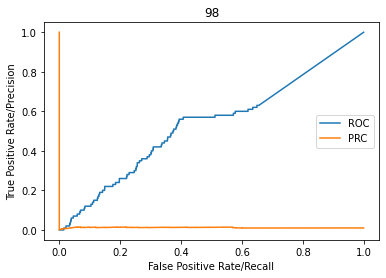

PRC AUC:0.011402022960547476
ROC AUC:0.5334075757575757


In [108]:
fpr99, tpr99, thresholds99 = roc_curve(Y_test[:,98], probs[:, 98])
prec99, recall99, thresholds99 = precision_recall_curve(Y_test[:,98], probs[:, 98])

plt.plot(fpr99,tpr99,label="ROC")
plt.plot(recall99,prec99,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('98')
plt.show()

print("PRC AUC:" + str(auc(recall99, prec99)))
print("ROC AUC:" + str(auc(fpr99, tpr99)))

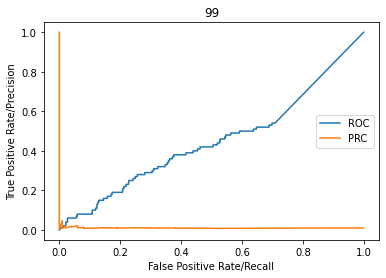

PRC AUC:0.009649994306506331
ROC AUC:0.4478060606060606


In [109]:
fpr100, tpr100, thresholds100 = roc_curve(Y_test[:,99], probs[:, 99])
prec100, recall100, thresholds100 = precision_recall_curve(Y_test[:,99], probs[:, 99])

plt.plot(fpr100,tpr100,label="ROC")
plt.plot(recall100,prec100,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('99')
plt.show()

print("PRC AUC:" + str(auc(recall100, prec100)))
print("ROC AUC:" + str(auc(fpr100, tpr100)))